# Análisis Exploratorio de Datos (EDA) - Tarea 30 de Enero

## Objetivo
Realizar un Exploratory Data Analysis (EDA) completo sobre una base de datos seleccionada, incluyendo:
- Análisis cuantitativo
- Análisis cualitativo
- Análisis gráfico
- Explicaciones de negocio

---

## Estudiantes
- Nombre: Manuela Caro Villada
- Nombre: Jeronimo Velasquez Escobar

## Fuentes de Datos Consultadas
1. **Base de datos 1**: [[Social Media In Students](https://www.kaggle.com/datasets/aminasalamt/social-media-dataset-2025)]
2. **Base de datos 2**: [[Food Order](https://www.kaggle.com/datasets/bhanupratapbiswas/uber-data-analysis)]
3. **Base de datos 3**: [[Perfiles de Compradores](https://www.kaggle.com/datasets/dhrubangtalukdar/e-commerce-shopper-behavior-amazonshopify-based)]

---
## Base de datos seleccionada

### **Food Oder Data Set**

La razon por la cual se eligio esta base de datos con respecto a las demas es debido a que las otras bases de datos no cumplian todos los requisitos que se necesitaban para la entrega. Pero existe el caso especial proveniente del data set de "Perfiles de Compradores", a diferencia de los demas data sets este cumplia todas las expectativas que buscabamos, pero al revisar mas profundamente nos dimos cuenta que este tenia datos sinteticos, los cuales no nos dan una vision real de lo que vamos a encontrar normalmente.



---
## Descripciones de las variables
- order_id: ID único del pedido
- customer_id: ID del cliente que realizó el pedido
- restaurant_name: Nombre del restaurante
- cuisine_type: Tipo de cocina ordenada por el cliente
- cost: Costo del pedido
- day_of_the_week: Indica si el pedido se realizó en un día entre semana o fin de semana (Entre semana es de lunes a viernes y fin de semana es sábado y domingo)
- rating: Calificación dada por el cliente de 5
- food_preparation_time: Tiempo (en minutos) que tarda el restaurante en preparar la comida. Se calcula tomando la diferencia entre las marcas de tiempo de la confirmación del pedido del restaurante y la confirmación de recogida de la persona de entrega
- delivery_time: Tiempo (en minutos) que tarda la persona de entrega en entregar el paquete de comida. Se calcula tomando la diferencia entre las marcas de tiempo de la confirmación de recogida de la persona de entrega y la información de entrega

## 1. Importación de Librerías

In [184]:
# Librerías para análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Librerías importadas exitosamente")

Librerías importadas exitosamente


## 2. Carga de Datos

In [185]:
# Cargar la base de datos seleccionada
df = pd.read_csv('food_order.csv')

print(f"Dimensiones del dataset: {df.shape}")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Dimensiones del dataset: (1898, 9)
Filas: 1898, Columnas: 9


## 3. Exploración Inicial del Dataset

In [186]:
# Primeras filas
print("Primeras 5 filas del dataset:")
print(df.head())
print("\n" + "="*80 + "\n")



Primeras 5 filas del dataset:
   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  




In [187]:
# Información del dataset
print("Información del dataset:")
print(df.info())
print("\n" + "="*80 + "\n")

Información del dataset:
<class 'pandas.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   str    
 3   cuisine_type           1898 non-null   str    
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   str    
 6   rating                 1898 non-null   str    
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), str(4)
memory usage: 133.6 KB
None




In [188]:
# Tipos de datos
print("Tipos de datos:")
print(df.dtypes)

Tipos de datos:
order_id                   int64
customer_id                int64
restaurant_name              str
cuisine_type                 str
cost_of_the_order        float64
day_of_the_week              str
rating                       str
food_preparation_time      int64
delivery_time              int64
dtype: object


In [204]:
# Transformacion de customer id a tipo cadena
df['customer_id'] = df['customer_id'].astype('string')
print(df.dtypes)

order_id                   int64
customer_id               string
restaurant_name              str
cuisine_type                 str
cost_of_the_order        float64
day_of_the_week              str
rating                       str
food_preparation_time      int64
delivery_time              int64
dtype: object


## 4. Análisis Cuantitativo

In [190]:
# Estadísticas descriptivas
print("Estadísticas descriptivas:")
# Basado en las descripciones de las variables proporcionadas, seleccionamos las siguientes columnas numéricas
numerical_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']
df_numerical = df[numerical_columns]
df_numerical['T_total'] = df_numerical['food_preparation_time'] + df_numerical['delivery_time']
df_numerical['rating'] = pd.to_numeric(df_numerical['rating'], errors='coerce')
print(df_numerical.describe())
print("\n" + "="*80 + "\n")


Estadísticas descriptivas:
       cost_of_the_order  food_preparation_time  delivery_time       rating  \
count        1898.000000            1898.000000    1898.000000  1162.000000   
mean           16.498851              27.371970      24.161749     4.344234   
std             7.483812               4.632481       4.972637     0.741478   
min             4.470000              20.000000      15.000000     3.000000   
25%            12.080000              23.000000      20.000000     4.000000   
50%            14.140000              27.000000      25.000000     5.000000   
75%            22.297500              31.000000      28.000000     5.000000   
max            35.410000              35.000000      33.000000     5.000000   

           T_total  
count  1898.000000  
mean     51.533720  
std       6.833603  
min      35.000000  
25%      47.000000  
50%      52.000000  
75%      56.000000  
max      68.000000  




In [191]:
# Valores faltantes
print("Valores faltantes por columna:")
print(df_numerical.isnull().sum())
print(f"\nPorcentaje de valores faltantes:\n{(df_numerical.isnull().sum() / len(df_numerical) * 100).round(2)}%")
print("\n" + "="*80 + "\n")

Valores faltantes por columna:
cost_of_the_order          0
food_preparation_time      0
delivery_time              0
rating                   736
T_total                    0
dtype: int64

Porcentaje de valores faltantes:
cost_of_the_order         0.00
food_preparation_time     0.00
delivery_time             0.00
rating                   38.78
T_total                   0.00
dtype: float64%




In [192]:
# Distribución de variables numéricas
print("Correlación entre variables numéricas:")
print(df_numerical.corr(numeric_only=True))

Correlación entre variables numéricas:
                       cost_of_the_order  food_preparation_time  \
cost_of_the_order               1.000000               0.041527   
food_preparation_time           0.041527               1.000000   
delivery_time                  -0.029949               0.011094   
rating                          0.033983              -0.006083   
T_total                         0.006358               0.685970   

                       delivery_time    rating   T_total  
cost_of_the_order          -0.029949  0.033983  0.006358  
food_preparation_time       0.011094 -0.006083  0.685970  
delivery_time               1.000000 -0.009804  0.735195  
rating                     -0.009804  1.000000 -0.011348  
T_total                     0.735195 -0.011348  1.000000  


In [193]:
df_na = df_numerical[df_numerical['rating'].isna()]
df_na[['cost_of_the_order','T_total']].corr(method='pearson')
#df_numerical[['delivery_time', 'food_preparation_time', 'rating', 'cost_of_the_order']].corr(method='pearson')

,cost_of_the_order,T_total
cost_of_the_order,1.000000,0.065481
T_total,0.065481,1.000000


### Resultados encontrados del analisis de variables cuantitativas

- Se encontró que el promedio del valor total de las compras realizadas son de 16.4 USD con una desviacion estandar (std) de 7.4, lo que nos da como resultado que la mayoria de las compras realizadas se encuentran dentro de 9 USD y 23.8 USD.

- Se encontro que el promedio de las calificaciones dejadas por los usuarios es de 4.344234, mas de el 50% de las calificaciones dejadas son de 5 puntos y la menor de esta son 3. Pero hay que tener en cuenta que un 40% de los datos ingresados no cuentan con una calificacion establecida. Para el analisis anterior no se tomaron en cuenta estos valores nulos.

- El tiempo de entrega promedio de cada pedido es de 51 minutos, esto se calculó teniendo en cuenta la suma de los tiempos que nos brinda el data set. Ademas de esta conclusion observamos que el std de el tiempo de entrega es de 6.8, lo que nos dice que la mayoria de las entregas tardan entre 
57.8 minutos y 44.2 minutos.

- El promedio de preparacion de un pedido promedio basandonos en los datos es de 27.3 minutos, con un std de 4.6, lo que nos dice que la mayoria de alimentos se preparan en un rango de 22.7 minutos y 33.3 minutos

- El promedio de tiempo en el que se reparten los pedidos luego de ser preeparados es de 24.1 minutos con un std 4.9 minutos lo que nos dice que la mayoria de las entregas estan en un rango de entre que se prepararon entre 29 minutos y 19.2 minutos.


## 5. Análisis Cualitativo

In [205]:
# Análisis de variables categóricas
print("Análisis de variables categóricas:\n")
not_numerical_columns = ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'customer_id']
df_categorical = df[not_numerical_columns]
for col in df_categorical.columns:
    print(f"\n{col} (únicos: {df_categorical[col].nunique()}):")
    print(df_categorical[col].value_counts().head(10))
    print("-" * 50)

Análisis de variables categóricas:


restaurant_name (únicos: 178):
restaurant_name
Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: count, dtype: int64
--------------------------------------------------

cuisine_type (únicos: 14):
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Name: count, dtype: int64
--------------------------------------------------

day_of_the_week (únicos: 2):
day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64
---------------------------

In [195]:
# from sklearn.preprocessing import LabelEncoder

# # Crear una copia del dataframe para el encoding
# df_encoded = df.copy()

# # Definir las columnas categóricas
# categorical_cols = ['restaurant_name', 'cuisine_type', 'day_of_the_week']

# # Aplicar Label Encoding a cada columna categórica
# label_encoders = {}
# for col in categorical_cols:
#     le = LabelEncoder()
#     df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col].astype(str))
#     label_encoders[col] = le
    
#     print(f"\n{col} - Mapeo de valores:")
#     for idx, label in enumerate(le.classes_):
#         print(f"  {label} → {idx}")

# print("\n" + "="*80 + "\n")
# print("Primeras filas con variables codificadas:")
# print(df_encoded[['restaurant_name', 'restaurant_name_encoded', 
#                    'cuisine_type', 'cuisine_type_encoded',
#                    'day_of_the_week', 'day_of_the_week_encoded']].head(10))

# print("\n" + "="*80 + "\n")
# print("Dimensiones del nuevo dataframe:")
# print(f"Filas: {df_encoded.shape[0]}, Columnas: {df_encoded.shape[1]}")

In [196]:
print(df_encoded.head())

   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  restaurant_name_encoded  cuisine_type_encoded  \
0             20                       67                     6   
1           

In [197]:
# Crear dataframe con restaurantes que tienen más de 10 pedidos
print("Conteo de pedidos por restaurante:")
restaurant_counts = df['restaurant_name'].value_counts()
print(restaurant_counts)
print("\n" + "="*80 + "\n")

# Filtrar restaurantes con más de 10 pedidos
restaurants_with_more_than_10 = restaurant_counts[restaurant_counts >= 5].index
print(f"Restaurantes con más de 10 pedidos: {len(restaurants_with_more_than_10)}")
print(f"Total de restaurantes en el dataset: {len(restaurant_counts)}")
print("\n" + "="*80 + "\n")

# Crear nuevo dataframe
df_filtered = df[df['restaurant_name'].isin(restaurants_with_more_than_10)]

print(f"Dimensiones del dataframe original: {df.shape}")
print(f"Dimensiones del dataframe filtrado: {df_filtered.shape}")
print(f"Porcentaje de datos retenidos: {(df_filtered.shape[0] / df.shape[0] * 100):.2f}%")
print("\n" + "="*80 + "\n")

# Mostrar información del nuevo dataframe
print("Primeras filas del dataframe filtrado:")
print(df_filtered.head(10))

print("\n" + "="*80 + "\n")
df_filtered['rating'] = pd.to_numeric(df_filtered['rating'], errors='coerce')
# Encontrar el restaurante con la calificación promedio más alta
restaurant_ratings = df_filtered.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False)
print("Calificación promedio por restaurante (ordenado de mayor a menor):")
print(restaurant_ratings)

print("\n" + "="*80 + "\n")
top_restaurant = restaurant_ratings.idxmax()
top_rating = restaurant_ratings.max()
worst_restaurant = restaurant_ratings.idxmin()
worst_rating = restaurant_ratings.min()

print(f"Restaurante con mejor calificación promedio: {top_restaurant}")
print(f"Calificación promedio: {top_rating:.2f}")
print(f"\nRestaurante con peor calificación promedio: {worst_restaurant}")
print(f"Calificación promedio: {worst_rating:.2f}")

Conteo de pedidos por restaurante:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Rye House                      1
Hiroko's Place                 1
Frank Restaurant               1
Sarabeth's West                1
'wichcraft                     1
Name: count, Length: 178, dtype: int64


Restaurantes con más de 10 pedidos: 69
Total de restaurantes en el dataset: 178


Dimensiones del dataframe original: (1898, 9)
Dimensiones del dataframe filtrado: (1681, 9)
Porcentaje de datos retenidos: 88.57%


Primeras filas del dataframe filtrado:
    order_id customer_id            restaurant_name   cuisine_type  \
1    1477685      358141  Blue Ribbon Sushi Izakaya       Japanese   
2    1477070       66393                Cafe Habana        Mexican   
3    1477334      106968  Blue Ribbon Fried Chicken       American   
5    1477224

In [198]:
df_copy = df.copy()
cuisine_counts = df_copy['cuisine_type'].value_counts()
print("\n" + "="*80 + "\n")
print("Conteo de tipos de cocina en el dataframe filtrado:")
print(cuisine_counts)

print("\n" + "="*80 + "\n")

# Encontrar el tipo de cocina con la calificación promedio más alta
df_copy['rating'] = pd.to_numeric(df_copy['rating'], errors='coerce')
cuisine_ratings = df_copy.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False)
print("Calificación promedio por tipo de cocina (ordenado de mayor a menor):")
print(cuisine_ratings)

print("\n" + "="*80 + "\n")
top_cuisine = cuisine_ratings.idxmax()
top_cuisine_rating = cuisine_ratings.max()
worst_cuisine = cuisine_ratings.idxmin()
worst_cuisine_rating = cuisine_ratings.min()

print(f"Tipo de cocina con mejor calificación promedio: {top_cuisine}")
print(f"Calificación promedio: {top_cuisine_rating:.2f}")
print(f"\nTipo de cocina con peor calificación promedio: {worst_cuisine}")
print(f"Calificación promedio: {worst_cuisine_rating:.2f}")



Conteo de tipos de cocina en el dataframe filtrado:
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64


Calificación promedio por tipo de cocina (ordenado de mayor a menor):
cuisine_type
Spanish           4.833333
Thai              4.666667
Indian            4.540000
Mexican           4.416667
Japanese          4.373626
Italian           4.360465
Chinese           4.338346
Southern          4.307692
French            4.300000
American          4.298913
Middle Eastern    4.235294
Mediterranean     4.218750
Korean            4.111111
Vietnamese        4.000000
Name: rating, dtype: float64


Tipo de cocina con mejor calificación promedio: Spanish
Calificación promedio: 4.83

Tipo de cocina con p

## Resultado de el analisis de las variables cualitativas

- Al analizar los resultados obtenidos de la columna restaurant_name, logramos observar que el restaurante con mayor cantidad de pedidos es Shake Shack.

- Al analizar los resultados obtenidos de la columna cuisine_type , obtuvimos que el tipo de comida que mas se ordena desde esta aplicacion es la comida Americana y la comida que menos se pide es la vietnamita.

- Al analizar los resultados obtenidos de la columna day_of_the_week, obtuvimos que la mayor parte de las personas que realizan pedidos desde esta aplicacion son los fines de semana. 

- Revisando las calificaciones de los restaurantes con al menos mas de 10 pedidos, llegamos a que el restaurante con una mejor calificacion promedio es Sushi Samba

- Revisando las calificaciones de las ordenes desde el punto de vista de el tipo de cocina, encontramos que el tipo de cocina mejor valorada es la española, y la peor valorada viene a ser la vietnamita.

- Haciendo un analisis manual de los datos, descubrimos que hay ciertos nombres de restaurantes los cuales hacen referencia al mismo, pero tienen diferencias lo que hace que el analisis actual contenga errores.

## Normalizacion de nombres.

Vamos a proceder a normalizar los nombres a mediante la vectorizacion de los mismos, con el fin de obtener mejores resultados en el analisis.

In [199]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
df_normalizado = pd.DataFrame()
df['restaurant_name'] = df['restaurant_name'].fillna('').astype(str)
df['restaurant_name'] = (
    df['restaurant_name'].str.strip().str.normalize('NFKC').str.encode('ascii', errors='ignore').str.decode('utf-8')
)
 
vectorizador = TfidfVectorizer(analyzer='word', ngram_range=(1,2))
tfidf = vectorizador.fit_transform(df['restaurant_name'])
 
sim_matrix = cosine_similarity(tfidf)
 
umbral = 0.50 #Porcentaje de similitud que buscaré entre los textos
G = nx.Graph()
 
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        if sim_matrix[i, j] >= umbral:
            G.add_edge(df.iloc[i]['restaurant_name'], df.iloc[j]['restaurant_name'])
 
grupos = list(nx.connected_components(G))

In [200]:
for idx, grupo in enumerate(grupos):

    if len(grupo) > 1:
        print(f"\nGrupo {idx + 1}:")
        for restaurante in grupo:
            print(f" - {restaurante}")


Grupo 2:
 - Blue Ribbon Sushi
 - Blue Ribbon Sushi Bar & Grill
 - Blue Ribbon Sushi Izakaya

Grupo 5:
 - Dirty Bird To Go (archived)
 - Dirty Bird to Go

Grupo 14:
 - Sushi of Gari 46
 - Sushi of Gari
 - Sushi of Gari Tribeca

Grupo 30:
 - Sarabeth's East
 - Sarabeth's Restaurant
 - Sarabeth's

Grupo 80:
 - Dos Caminos
 - Dos Caminos Soho


## DUDAS

Al momento de hacer la normalizacion de los observamos que en algunos casos, la diferencia entre los nombres se debe a que son 2 locales, diferentes.Esta situacion hizo que se nos presentara una duda , Deberiamos "agrupar" estos restaurantes que siendo la misma cadena (Poseen el mismo nombre) son locales distintos? No logramos resolver esto, debido a que hay opiniones separadas.

## 6. Análisis Gráfico

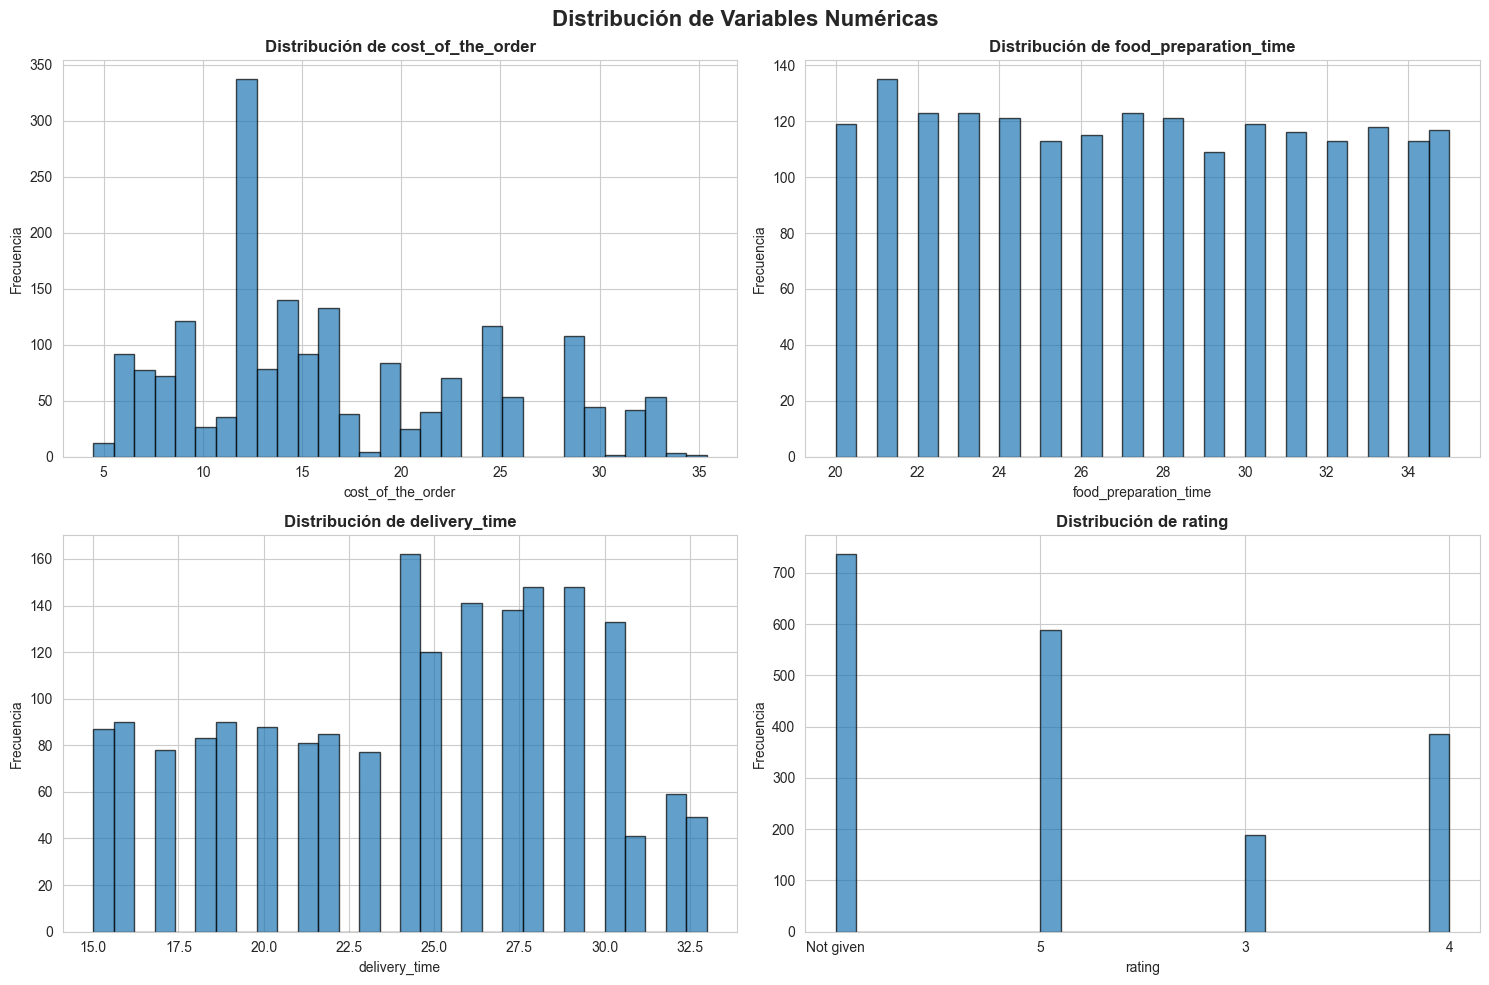

In [201]:
# Gráficos de distribución de variables numéricas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribución de Variables Numéricas', fontsize=16, fontweight='bold')

numeric_cols = df_numerical.select_dtypes(include=[np.number]).columns[:4]  # Primeras 4 columnas numéricas
for idx, col in enumerate(numeric_cols):
    ax = axes[idx // 2, idx % 2]
    df[col].hist(bins=30, ax=ax, edgecolor='black', alpha=0.7)
    ax.set_title(f'Distribución de {col}', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

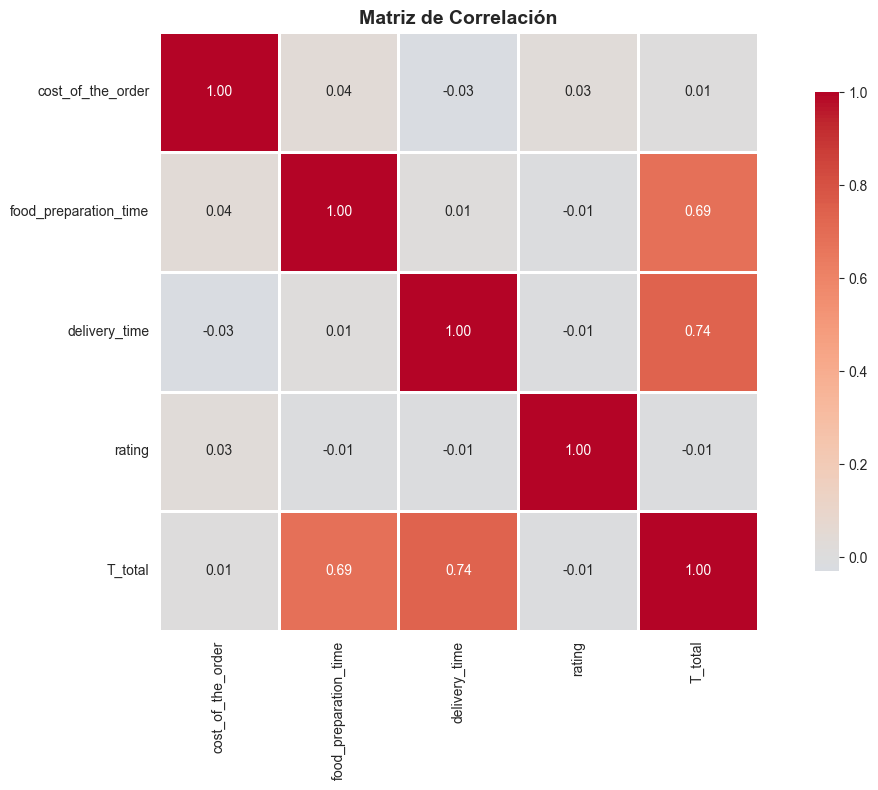

In [202]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df_numerical.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

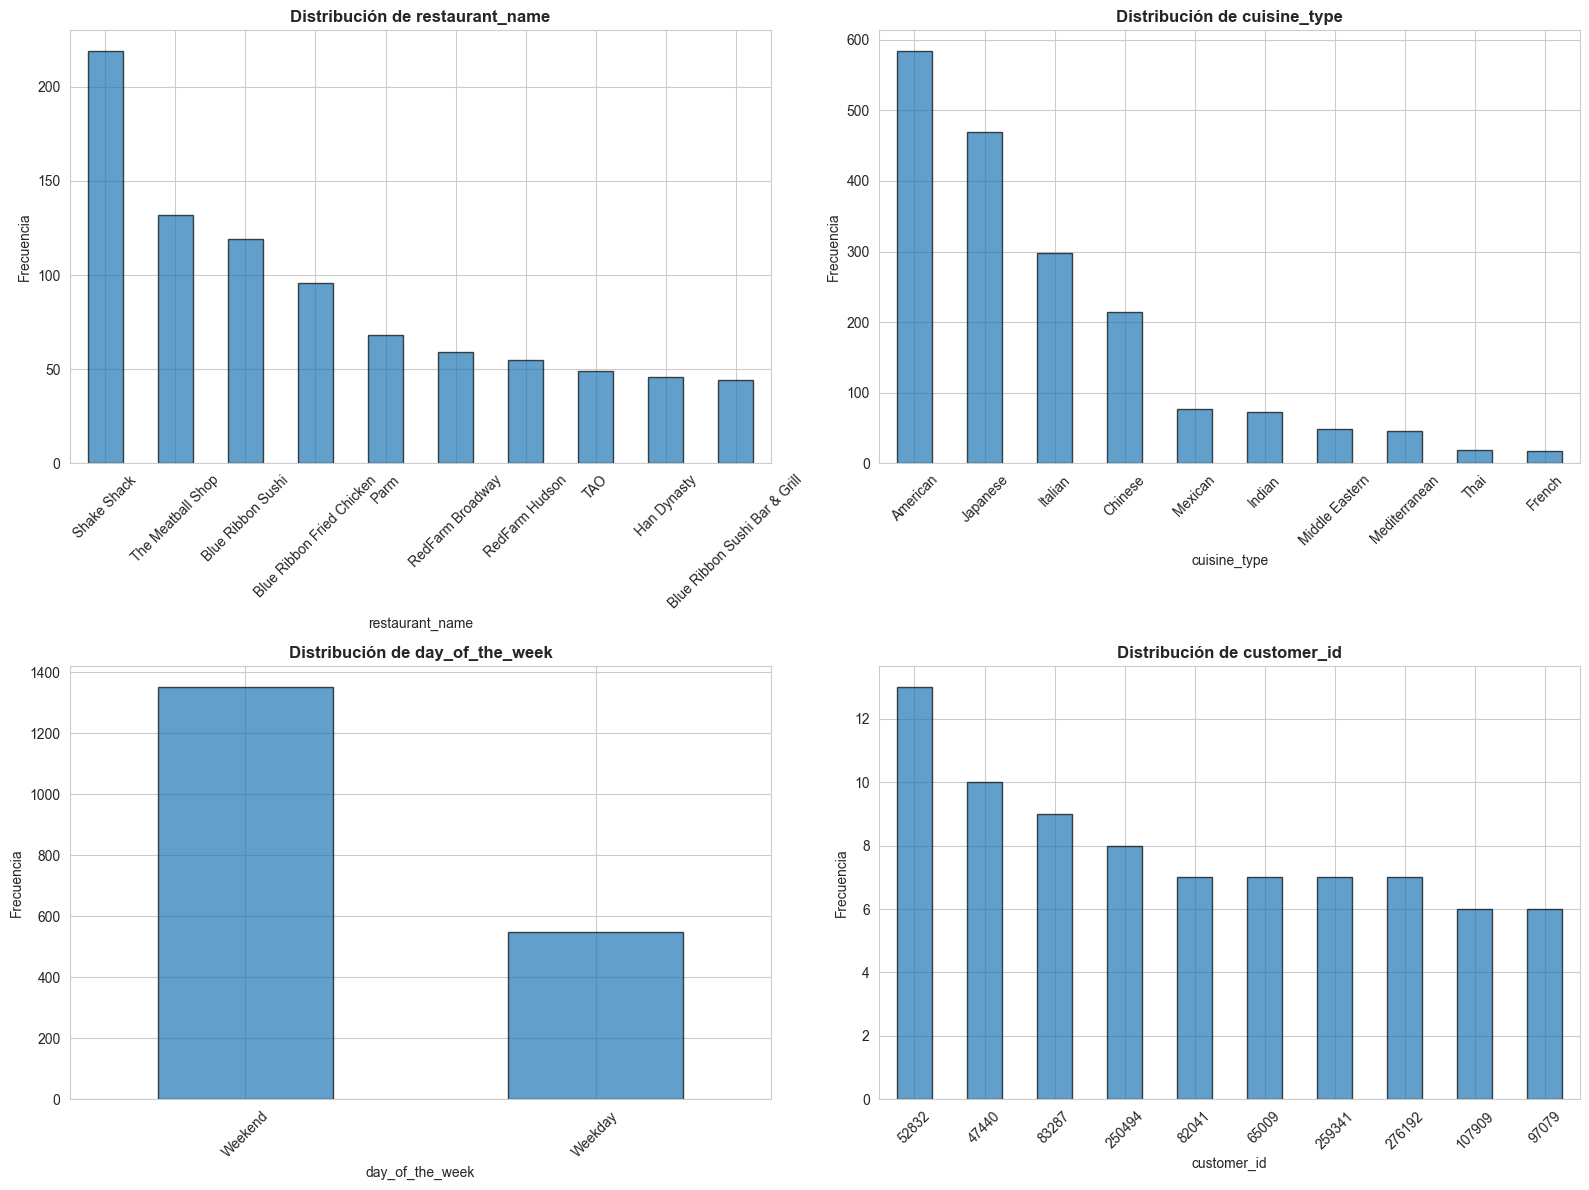

In [210]:
# Gráficos de barras para variables categóricas
categorical_cols = ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'customer_id']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()  # Convertir a array 1D para iterar correctamente

for idx, col in enumerate(categorical_cols):
    if idx < len(axes):
        df[col].value_counts().head(10).plot(kind='bar', ax=axes[idx], edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribución de {col}', fontweight='bold')
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].set_xlabel(col)
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 7. Hallazgos y Explicaciones de Negocio

### 7.1 Resumen Ejecutivo
Describe aquí los hallazgos principales del análisis:
- El unico patron encontrado dentro de los datos que consultamos es que en la mayoria de casos las personas prefieren realizar ordenes a travez de esta aplicacion los fines de semana.
- Anomalías detectadas:
1. Detectamos muchos valores atipicos, mas especificamente, encontramos muchos restaurantes los cuales solamente contaban con una orden.

2. Ademas encontramos las pequeñas diferencias entre los nombres la cual ya hemos mencionado anteriormente, la cual nos dio la idea de realizar la normalizacion de los datos mendiante un proceso de vectorizacion.

3. Por otra parte encontramos muchisimas ordenes las cuales carecian de un rating establecido, lo cual es un problema para encontrar patrones reales y pero nos da la oportunidad de investigar a fondo la razon por la cual en muchos casos las personas no dejan calificaciones dentro de este tipo de aplicaciones.

- Oportunidades de negocio:
En base a los datos extraidos y revisados, se puede crear analisis mas profundos los cuales nos pueden ayudar a resolver preguntas, como por ejemplo: 

1. Que puede afectar mas en la calificacion de el cliente? El tiempio de preparacion o entrega?

2. A partir de cuantos minutos de preparacion y entrega el rating comienza a cae?

3. Que tipo de comida trata mas en prepararse?

4. Los clientes son mas tolerantes con el tiempo cuando el costo es bajo?

5. Que restaurantes generan alto ingreso pero baja satisfaccion?

6. Que tipo de cocina, genera mas quejas?

7. Los clientes regulares piden siempre el mismo de comida? O se puede representar sus gustos y generar recomendaciones de algun tipo?

A partir de el analisis de estos resultados este tipo de negocios puede llegar a beneficiarse mejorando los restaurantes a los que permite ingresar a la aplicacion, lo que a largo plazo puede crear una mejor reputacion de la aplicacion y de la misma forma aumentar los ingresos de la misma.


### 7.2 Recomendaciones de Negocio
- Mejorar la cantidad de reseñas que se dejan en la aplicacion. Con una mayor cantidad de datos es posible responder preguntas y encontrar patrones gracias a los datos.
- Al momento de almacenar los datos seria beneficioso que se se cree un identificador o ID para los restaurantes, con el fin de que no haya ningun tipo de problema al momento de realizar los analisis.
- Seria beneficioso realizar descuentos exporadicos a los usuarios que mas utilizan y realizan ordenes dentro de la aplicacion, con el fin de mejorar su fidelidad al negocio.
- Dar mayor visibilidad a los pequeños negocios a travez de publicidad y descuentos.

### 7.3 Limitaciones y Próximos Pasos
- No hay suficientes datos para realizar un analisis a profundidad.
- Ampliar la cantidad de datos que se guardan y exponen.

## 8. Metodología de Ciencia de Datos Aplicada

Este análisis sigue la metodología **CRISP-DM** (Proceso Estándar Intersectorial para la Minería de Datos):

### 1. **Comprensión del Negocio (Business Understanding)**
- Identificar objetivos: Analizar patrones de pedidos en plataformas de entrega de comida
- Definir requisitos: Datos numéricos, ordinales y descripciones para un análisis completo
- Stakeholders: Empresas de tecnología y restaurantes interesados en optimizar operaciones

### 2. **Comprensión de los Datos (Data Understanding)**
- Recopilación: Descarga de base de datos Food Order desde Kaggle
- Exploración: Análisis de 9 variables con 1000+ registros
- Características: Datos sobre pedidos, restaurantes, tiempos y calificaciones
- Calidad: Identificación de 40% de datos faltantes en ratings

### 3. **Preparación de Datos (Data Preparation)**
- Limpieza: Manejo de valores nulos y transformación de tipos de datos
- Transformación: Conversión de customer_id a string, cálculo de tiempos totales
- Normalización: Vectorización TF-IDF de nombres de restaurantes con NetworkX para detectar duplicados
- Filtrado: Selección de restaurantes con 5+ pedidos para análisis confiables

### 4. **Modelado (Modeling)**
- Técnicas estadísticas: Análisis de correlaciones, estadísticas descriptivas
- Análisis categórico: Conteos y agrupaciones por restaurante, tipo de cocina, día de la semana
- Análisis de similitud: Uso de cosine similarity para identificar restaurantes con nombres similares
- Visualización: Distribuciones, matrices de correlación, gráficos de barras

### 5. **Evaluación (Evaluation)**
- Validación de resultados: Confirmación de hallazgos (Shake Shack como restaurante más popular, cocina española mejor valorada)
- Interpretación: Explicación de patrones encontrados (preferencia por pedidos en fin de semana)
- Limitaciones identificadas: Datos faltantes y nombres duplicados de restaurantes
- Oportunidades detectadas: Preguntas de negocio para análisis futuro

### 6. **Despliegue (Deployment)**
- Documentación: Notebook con análisis completo y explicaciones de negocio
- Recomendaciones: Sugerencias para mejorar la calidad de datos y experiencia del usuario
- Próximos pasos: Implementación de sistemas de recordatorio de ratings y mejora de datos demográficos

---

**Fecha de Finalización**: 30 de enero de 2026  
**Herramientas Utilizadas**: Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, NetworkX

---
Se utilizó copilot para el desarrollo de este taller y de la misma forma para el desarrollo de este entregable.